In [79]:
%%javascript
$.getScript('../ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [80]:
from IPython.display import Markdown,display,Math
Markdown('[<< back to chapter content](./content.ipynb)')

[<< back to chapter content](./content.ipynb)

<div id="toc"></div>

In [81]:
%matplotlib inline
import time
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image, SVG, YouTubeVideo
from helpers import show_hide


# Linear filtering

In the previous chapter, the processed value of a pixel was only a function of its orignal value. Here the processed value will also take into account the surrounding pixels as well. We speak about pixel *neighborhood. *

##Neighborhood
Pixel neighborhood is defined by a binary structuring element $B$ having an origin.

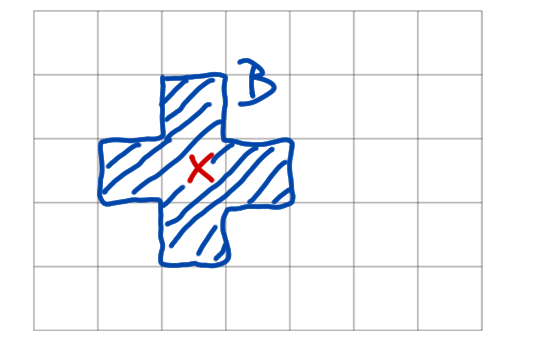

In [82]:
Image('http://homepages.ulb.ac.be/~odebeir/data/b.png')

For a specific pixel (the gray one below), the neighborhood defined by $B$ ...

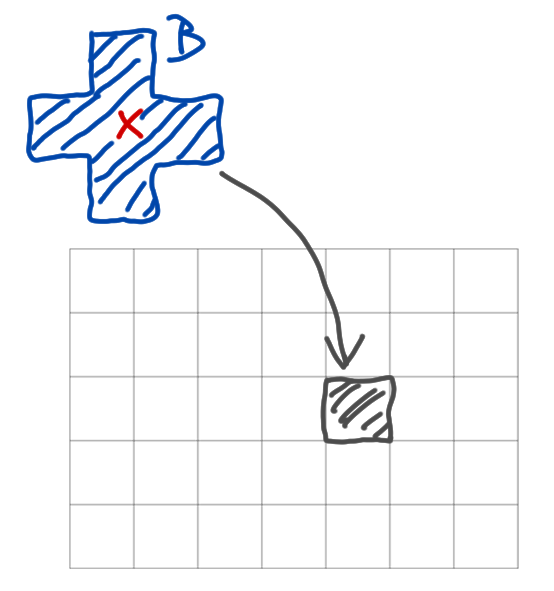

In [83]:
Image('http://homepages.ulb.ac.be/~odebeir/data/b1.png')

is the ensemble of pixels belonging to $B$ when its origin is moved on the pixel of interest.

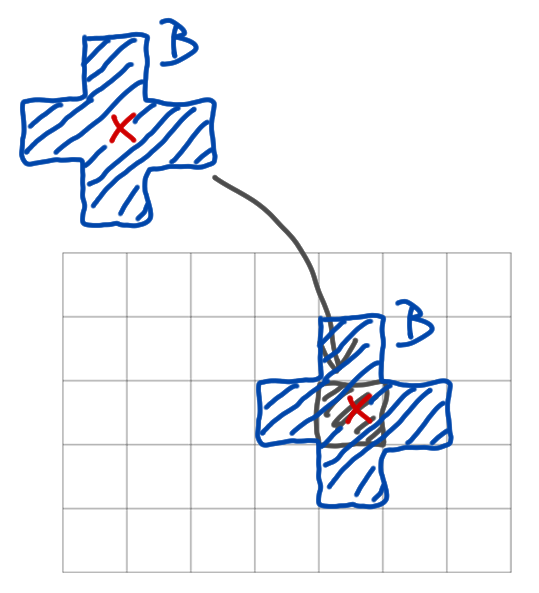

In [84]:
Image('http://homepages.ulb.ac.be/~odebeir/data/b2.png')

Structuring elements can have any size and shape. Often the size of the structuring element will directly impact the process and also the processing time. 

The previous element is known as the 4-neighbors.

Common structuring element are:

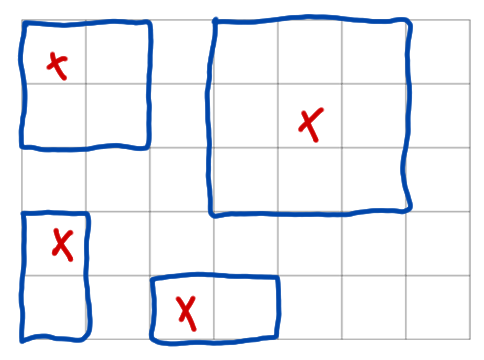

In [85]:
Image('http://homepages.ulb.ac.be/~odebeir/data/b3.png')

the upper right is known as the 8-neighbors, we understand why...

One also use bigger element, such as disk with a bigger radious such as:

In [86]:
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.data import camera,lena
plt.style.use('ggplot')



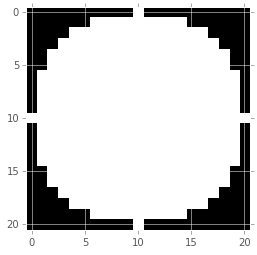

In [87]:
plt.figure()
plt.imshow(disk(10),cmap=cm.gray,interpolation='nearest');


Question:
* what appens close to the borders ?

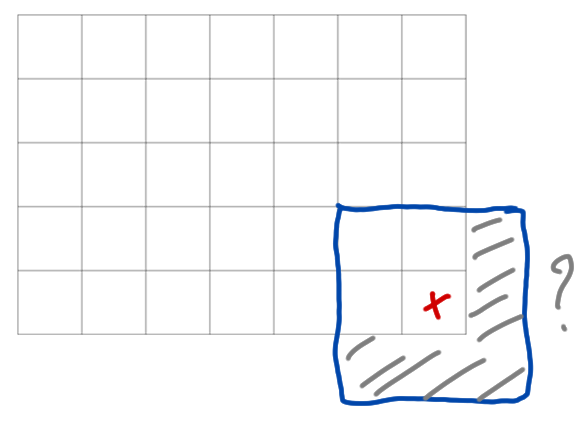

In [88]:
Image('http://homepages.ulb.ac.be/~odebeir/data/b5.png')

##Convolution
a

##Fourier transform
a

##Image enhancement
a

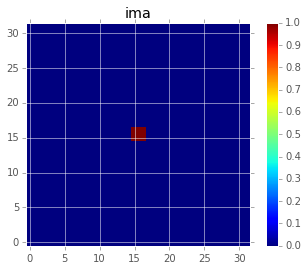

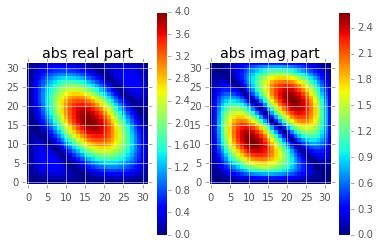

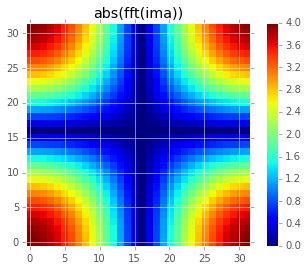

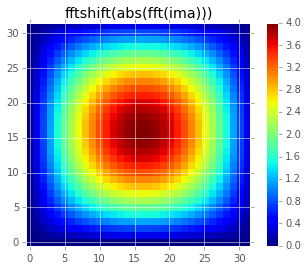

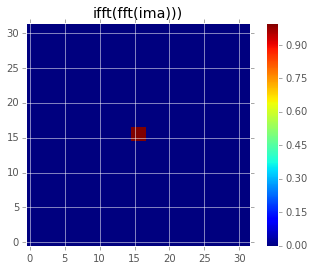

In [89]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plab
import matplotlib.cm as cm
import scipy as scp
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
from scipy import ndimage

w = 32
r = np.zeros((w,w),dtype = np.complexfloating)
r[w/2-1:w/2+1,w/2-1:w/2+1] = 1.0 + 0.0j

F = fft2(r)
rr = ifft2(F)

real_part = np.abs(F.real)
imag_part = np.abs(F.imag)

fig = plt.figure(1)
plt.imshow(r.real,interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('ima')

fig = plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(fftshift(real_part),interpolation='nearest',origin='lower')
plt.title('abs real part')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(fftshift(imag_part),interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('abs imag part')

fig = plt.figure(3)
plt.imshow(np.abs(F),interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('abs(fft(ima))')

fig = plt.figure(4)
plt.imshow(np.abs(fftshift(F)),interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('fftshift(abs(fft(ima)))')

fig = plt.figure(5)
plt.imshow(rr.real,interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('ifft(fft(ima)))')

plt.show()

/home/olivier/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


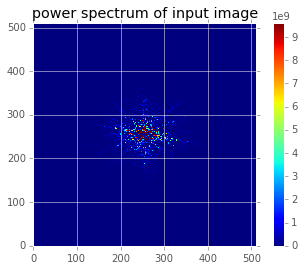

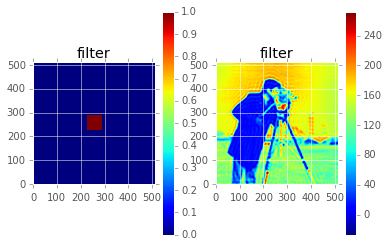

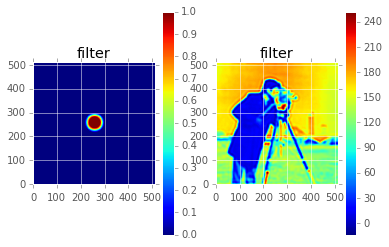

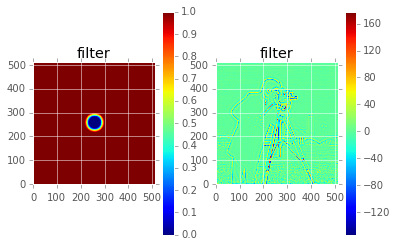

In [90]:
from skimage.data import camera
from skimage.filters import rank as skr
from skimage.morphology import disk

im = camera()[-1::-1,::]

w,h = im.shape

n = 32

#square filter
s = np.zeros(im.shape,dtype = np.complexfloating)
s[w/2-n:w/2+n,h/2-n:h/2+n] = 1.0 + 0.0j

#circular filter 
c = np.zeros(im.shape,dtype = np.complexfloating)
for i in range(w):
    for j in range(h):
        if ((i-w/2)**2 + (j-h/2)**2)<(n*n):
            c[i,j] = 1.0 + 0.0j
            
#smooth filter borders
c = skr.mean((c*255).astype('uint8'),disk(10))
c = c.astype(np.complexfloating)/255.0

F1 = fft2(im.astype(np.complexfloating))
F3 = F1*ifftshift(s)
F4 = F1*ifftshift(c)

#high pass using the complement of c
F5 = F1*ifftshift(1.0-c)

psF1 = (F1**2).real

low_pass_rec = ifft2(F3) 
low_pass_circ = ifft2(F4)
high_pass_circ = ifft2(F5) 

fig = plt.figure(1)
plt.imshow(fftshift(psF1),interpolation='nearest',origin='lower',vmin = 0,vmax = 0.00001*np.max(psF1))
plt.title('power spectrum of input image')
plt.colorbar()

fig = plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(s.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(low_pass_rec.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()

fig = plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(c.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(low_pass_circ.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()

fig = plt.figure(4)
plt.subplot(1,2,1)
plt.imshow(1.0-c.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(high_pass_circ.real,interpolation='nearest',origin='lower')
plt.title('filter')
plt.colorbar()

plt.show()

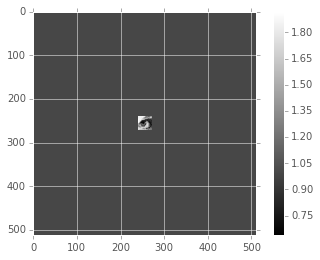

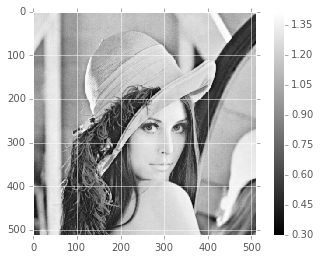

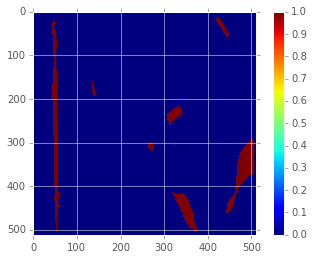

In [91]:
from skimage.data import lena


im = lena()[:,:,0].astype('float')
target_center = (332,266)
w = 16
crop = im[target_center[1]-w:target_center[1]+w,target_center[0]-w:target_center[0]+w]
size = im.shape

g = np.zeros(size,dtype = np.complexfloating)
g.fill(128)
g[size[1]/2-w:size[1]/2+w,size[0]/2-w:size[0]/2+w] = crop

#normalize
g = g/np.mean(g)
f = im/np.mean(im)

plt.figure(2)
plt.imshow(g.real,interpolation='nearest',cmap=cm.gray)
plt.colorbar()

f = f.astype(np.complexfloating)
F = fft2(f)
G = np.conjugate(fft2(g))

plt.figure(3)
plt.imshow(f.real,interpolation='nearest',cmap=cm.gray)
plt.colorbar()


R = F*G
r = ifft2(R).real

top = ( r >= (0.9999*np.max(r)))

plt.figure(4)
plt.imshow(ifftshift(top),interpolation='nearest')
plt.colorbar()


plt.show()

> see also:
* linear filtering [DIP](../00-Preface/06-References.ipynb#[DIP])_ p.499
* Fourier transform [IPAMV](../00-Preface/06-References.ipynb#[IPAMV]) p1, DFT,FFT [HCVA] vol2 p51
* raster removal [IPH](../00-Preface/06-References.ipynb#[IPH]) p320 (adaptive enh)

In [92]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [93]:
print('Last updated: %s' %time.strftime('%d/%m/%Y'))
HTML(show_hide)

Last updated: 22/07/2015
